# Preparing object for velocity based trajectory analysis with unspliced reads
- recover unspliced reads from early versions (pre-QC) of the object

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
sc.logging.print_header()

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 221900 × 18485
    var: 'gene_ids-0-0-query', 'feature_type-0-0-query', 'mito-0-0-query', 'ribo-0-0-query', 'hb-0-0-query', 'n_counts-0-0-query', 'n_counts_raw-0-0-query', 'n_counts_spliced-0-0-query', 'n_counts_unspliced-0-0-query', 'n_cells-0-0-query', 'n_cells_raw-0-0-query', 'n_cells_spliced-0-0-query', 'n_cells_unspliced-0-0-query', 'cc-0-0-query', 'ig-0-0-query', 'tcr-0-0-query', 'gene_id-1-0-query', 'mt-1-0-query', 'ensmbl_id-colon-1-0-query', 'n_cells_by_counts-colon-1-0-query', 'mean_counts-colon-1-0-query', 'pct_dropout_by_counts-colon-1-0-query', 'total_counts-colon-1-0-query', 'n_cells_by_counts-ileum-1-0-query', 'mean_counts-ileum-1-0-query', 'pct_dropout_by_counts-ileum-1-0-query', 'total_counts-ileum-1-0-query', 'gene_ids-reference', 'feature_type-reference', 'mito-reference', 'ribo-reference', 'hb-reference', 'n_counts-reference', 'n_counts_raw-reference', 'n_counts_spliced-reference', 'n_counts_unspliced-reference', 'n_cells-referen

In [8]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


latent coordinates for small intestine:
/nfs/team205/ao15/Megagut/Annotations_v3/models/scanvi_compartments/epi/disease_fine_annot_predict_Epi_SI_adult_method2_20230221_RAMNIK_KLENERMAN_POOLED_scANVIobsm_TApooled.csv.gz

In [9]:
adata.obs.study.value_counts()

Kong2023            147244
Elmentaite2021       34790
Martin2019           11932
Wang2020              8121
CBTM_unpublished      5150
Dominguez2022         5039
Yu2021                4028
He2020GenomeBio       3254
Fitzpatrick2023       2300
Jaeger2021              39
James2020                3
Name: study, dtype: int64

In [10]:
remapped = adata[~adata.obs.study.isin(['Kong2023','Fitzpatrick2023'])].copy()

In [12]:
remapped

AnnData object with n_obs × n_vars = 72356 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [16]:
remapped.obsm['X_scANVI']

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998,0.293385,-3.540436,1.153689,1.363747,0.162819,0.075178,-0.123713,-0.003367,-0.664285,0.002887,-0.031664,-1.870653,-0.299399,-2.031727,-0.074187,0.054876,0.295265,1.125695,-1.449880,-0.522796
CGAGCCACAGTCTTCC-HCA_A_GT12934998,-0.377136,-3.276517,0.608485,1.182109,0.127934,0.057879,-0.114392,-0.070030,1.101712,0.028682,-0.076216,-0.925817,-0.496540,-1.777615,-0.019968,0.068005,0.731401,0.761959,-0.582981,0.269618
CGTCTACCAAAGGTGC-HCA_A_GT12934999,-0.195501,-4.335445,-0.052914,0.989104,0.087535,0.085977,-0.159474,0.067592,-0.300586,0.035797,-0.046410,-1.467387,-0.633082,-1.343153,-0.032336,0.061169,1.044588,1.348170,-0.786980,-0.069734
CGTTCTGGTCGCATAT-HCA_A_GT12934999,-0.369807,-3.273262,0.894533,1.024411,0.129525,0.045428,-0.033010,0.004962,-0.422783,-0.012876,-0.032173,-2.797130,-0.236523,-1.926470,-0.088321,0.054802,0.807953,1.117136,-0.214406,0.522771
GCGCGATGTGATAAGT-HCA_A_GT12934999,0.192580,-2.137081,0.257594,1.590400,0.090523,0.078970,-0.022076,-0.087916,0.367922,0.000026,-0.011049,-1.854900,0.250816,-1.304667,-0.047977,0.112960,0.545367,0.740722,-0.655852,0.882289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGGCATAGAAGCCCA-GSM4766849,-0.673747,-1.402705,-0.279747,0.990030,0.096986,0.054046,0.002890,-0.075207,0.997190,-0.049685,-0.026813,-1.759587,-0.258187,-0.520837,0.008731,-0.020384,1.681760,-0.666173,0.181908,-1.863400
TCAATCTAGAAACCTA-GSM4766849,-0.602218,0.060686,-0.471260,1.202130,0.067766,0.110187,0.019348,-0.127294,-0.483630,0.010118,-0.052293,-0.347715,0.341440,0.502420,0.030921,0.115468,2.396488,-0.958843,0.254664,1.087516
TGGTTAGAGTGCCATT-GSM4766849,1.012939,1.536719,0.648681,0.869952,0.120557,0.156156,-0.019560,-0.184944,0.241577,0.037287,-0.016778,1.307485,-0.613922,-0.051290,-0.017890,0.124536,-3.114767,0.164994,-1.520613,-0.759567


export X_scANVI from object and input into object with all genes

In [17]:
remapped.obsm['X_scANVI'].to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/Epi_SI_AP.pooled_healthy_disease.onlyremapped.X_scanvi_coordinates.20231106.csv')

In [18]:
coords = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/Epi_SI_AP.pooled_healthy_disease.onlyremapped.X_scanvi_coordinates.20231106.csv',index_col=0)

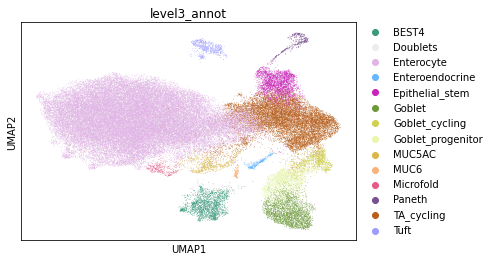

In [21]:
sc.pp.neighbors(remapped, use_rep="X_scANVI")
sc.tl.umap(remapped)
sc.pl.umap(remapped, color=['level3_annot'])

In [22]:
remapped.obs.level_3_annot.value_counts()

Enterocyte                     47136
TA                             11700
Goblet                          2843
Epithelial_stem                 2623
BEST4_enterocyte_colonocyte     2057
Goblet_progenitor               2024
Goblet_cycling                  1394
Surface_foveolar                 718
Tuft                             642
Paneth                           414
Microfold                        338
Enteroendocrine                  324
Mucous_gland_neck                143
Name: level_3_annot, dtype: int64

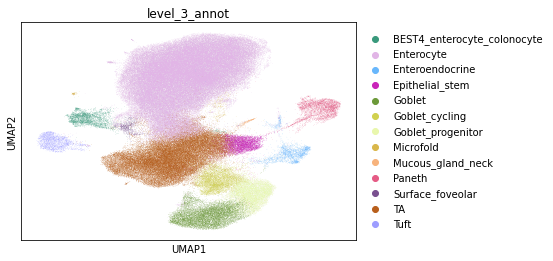

In [24]:
sc.pl.umap(adata, color=['level_3_annot'])

In [27]:
index_list = list(coords.index.values)

In [28]:
index_list

['ACTGCTCAGTCCAGGA-HCA_A_GT12934998',
 'CGAGCCACAGTCTTCC-HCA_A_GT12934998',
 'CGTCTACCAAAGGTGC-HCA_A_GT12934999',
 'CGTTCTGGTCGCATAT-HCA_A_GT12934999',
 'GCGCGATGTGATAAGT-HCA_A_GT12934999',
 'ACGATACTCCGCAAGC-HCA_A_GT12935002',
 'ACGATGTGTACCCAAT-HCA_A_GT12935002',
 'AGGCCGTTCTCACATT-HCA_A_GT12935002',
 'CAACCTCAGAGTGAGA-HCA_A_GT12935002',
 'CACAGTAAGGGTATCG-HCA_A_GT12935002',
 'CCTAGCTTCTCGGACG-HCA_A_GT12935002',
 'CGCTATCAGTACCGGA-HCA_A_GT12935002',
 'CTCGGGACATTCCTGC-HCA_A_GT12935002',
 'GCGCAACCATAGAAAC-HCA_A_GT12935002',
 'GCTTCCAAGAGGGCTT-HCA_A_GT12935002',
 'TCAATCTTCCTTGCCA-HCA_A_GT12935002',
 'TCTCTAACAGCCTATA-HCA_A_GT12935002',
 'TGCCAAAAGCAGACTG-HCA_A_GT12935002',
 'TTCTCAACAGTGGGAT-HCA_A_GT12935002',
 'AAACCTGAGGAGTCTG-HCA_A_GT12935007',
 'AAACCTGCATACTCTT-HCA_A_GT12935007',
 'AAACCTGGTGATGCCC-HCA_A_GT12935007',
 'AAACCTGGTTAAGATG-HCA_A_GT12935007',
 'AAACCTGTCAAGCCTA-HCA_A_GT12935007',
 'AAACCTGTCATTCACT-HCA_A_GT12935007',
 'AAACGGGAGACCTTTG-HCA_A_GT12935007',
 'AAACGGGAGC

Load objects with unspliced reads in layers pre-QC

In [1]:
#restart instance due to limited resources
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
healthy = sc.read_h5ad('/lustre/scratch126/cellgen/team205/nh3/20220125_digestive_tract_integration/v2/h5ad/pooled/pooled_healthy.gene_velo_cellbender.post_qc.20220909.h5ad')

In [3]:
healthy

AnnData object with n_obs × n_vars = 1910334 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [9]:
obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
obs

,latent_cell_probability,latent_RT_efficiency,cecilia22_predH,cecilia22_predH_prob,cecilia22_predH_uncertain,cecilia22_predL,cecilia22_predL_prob,cecilia22_predL_uncertain,elmentaite21_pred,elmentaite21_pred_prob,...,TX_antibiotic,Smoking,batch,celltype,fine_predicted_labels,fine_predicted_labels_uncertainty,scanvi_pred,fine_predicted_labels_uncertflagged,certain_vs_uncertain,level_3_annot
index,,,,,,,,,,,,,,,,,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998,0.990980,0.637057,Erythroid,0.170996,Uncertain,Late erythroid,0.039134,Uncertain,TA,0.731808,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGAGCCACAGTCTTCC-HCA_A_GT12934998,0.997107,0.533083,Plasma cells,0.896878,Plasma cells,Plasma cells,0.786204,Plasma cells,IgA plasma cell,0.789328,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTCTACCAAAGGTGC-HCA_A_GT12934999,0.999977,2.312154,ILC,0.999363,ILC,Plasmablasts,0.942337,Plasmablasts,NK cell,0.921839,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTTCTGGTCGCATAT-HCA_A_GT12934999,0.999711,0.571661,ILC,0.967104,ILC,Plasmablasts,0.243794,Uncertain,NK cell,0.035073,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
GCGCGATGTGATAAGT-HCA_A_GT12934999,0.998750,0.312687,ILC,0.853844,ILC,Plasmablasts,0.297330,Uncertain,NK cell,0.484669,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,query,EECs,Enteroendocrine,0.000000,Enteroendocrine,Enteroendocrine,Certain (=< 0.3),Enteroendocrine
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,query,Mature Enterocytes,Enterocyte,0.200049,Enterocyte,Enterocyte,Certain (=< 0.3),Enterocyte
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,query,EECs,Enteroendocrine,0.599076,Enteroendocrine,Uncertain (> 0.3),Uncertain (> 0.3),Enteroendocrine


In [11]:
obs = obs[~obs.study.isin(['Kong2023','Fitzpatrick2023'])]

In [12]:
obs

,latent_cell_probability,latent_RT_efficiency,cecilia22_predH,cecilia22_predH_prob,cecilia22_predH_uncertain,cecilia22_predL,cecilia22_predL_prob,cecilia22_predL_uncertain,elmentaite21_pred,elmentaite21_pred_prob,...,TX_antibiotic,Smoking,batch,celltype,fine_predicted_labels,fine_predicted_labels_uncertainty,scanvi_pred,fine_predicted_labels_uncertflagged,certain_vs_uncertain,level_3_annot
index,,,,,,,,,,,,,,,,,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998,0.990980,0.637057,Erythroid,0.170996,Uncertain,Late erythroid,0.039134,Uncertain,TA,0.731808,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGAGCCACAGTCTTCC-HCA_A_GT12934998,0.997107,0.533083,Plasma cells,0.896878,Plasma cells,Plasma cells,0.786204,Plasma cells,IgA plasma cell,0.789328,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTCTACCAAAGGTGC-HCA_A_GT12934999,0.999977,2.312154,ILC,0.999363,ILC,Plasmablasts,0.942337,Plasmablasts,NK cell,0.921839,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTTCTGGTCGCATAT-HCA_A_GT12934999,0.999711,0.571661,ILC,0.967104,ILC,Plasmablasts,0.243794,Uncertain,NK cell,0.035073,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
GCGCGATGTGATAAGT-HCA_A_GT12934999,0.998750,0.312687,ILC,0.853844,ILC,Plasmablasts,0.297330,Uncertain,NK cell,0.484669,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGGCATAGAAGCCCA-GSM4766849,1.000000,3.575713,Epithelial cells,0.450146,Epithelial cells,Epithelial cells,0.776503,Epithelial cells,Enterocyte,0.923375,...,NaN,NaN,query,NaN,Goblet_cycling,5.997944e-02,Goblet_cycling,Goblet_cycling,Certain (=< 0.3),Goblet_cycling
TCAATCTAGAAACCTA-GSM4766849,1.000000,6.682850,Epithelial cells,0.999490,Epithelial cells,Epithelial cells,0.999738,Epithelial cells,Enterocyte,0.994392,...,NaN,NaN,query,NaN,Enterocyte,1.799458e-01,TA_cycling,Enterocyte,Certain (=< 0.3),Enterocyte
TGGTTAGAGTGCCATT-GSM4766849,1.000000,4.282772,Epithelial cells,0.999632,Epithelial cells,Epithelial cells,0.999142,Epithelial cells,Enterocyte,1.000000,...,NaN,NaN,query,NaN,Enterocyte,5.960464e-08,Enterocyte,Enterocyte,Certain (=< 0.3),Enterocyte


In [13]:
obs.include_150722.value_counts()

healthy_reference    63565
disease               8791
Name: include_150722, dtype: int64

In [14]:
index_list = list(obs.include_150722.isin(['healthy_reference']).index.values)

In [15]:
index_list

['ACTGCTCAGTCCAGGA-HCA_A_GT12934998',
 'CGAGCCACAGTCTTCC-HCA_A_GT12934998',
 'CGTCTACCAAAGGTGC-HCA_A_GT12934999',
 'CGTTCTGGTCGCATAT-HCA_A_GT12934999',
 'GCGCGATGTGATAAGT-HCA_A_GT12934999',
 'ACGATACTCCGCAAGC-HCA_A_GT12935002',
 'ACGATGTGTACCCAAT-HCA_A_GT12935002',
 'AGGCCGTTCTCACATT-HCA_A_GT12935002',
 'CAACCTCAGAGTGAGA-HCA_A_GT12935002',
 'CACAGTAAGGGTATCG-HCA_A_GT12935002',
 'CCTAGCTTCTCGGACG-HCA_A_GT12935002',
 'CGCTATCAGTACCGGA-HCA_A_GT12935002',
 'CTCGGGACATTCCTGC-HCA_A_GT12935002',
 'GCGCAACCATAGAAAC-HCA_A_GT12935002',
 'GCTTCCAAGAGGGCTT-HCA_A_GT12935002',
 'TCAATCTTCCTTGCCA-HCA_A_GT12935002',
 'TCTCTAACAGCCTATA-HCA_A_GT12935002',
 'TGCCAAAAGCAGACTG-HCA_A_GT12935002',
 'TTCTCAACAGTGGGAT-HCA_A_GT12935002',
 'AAACCTGAGGAGTCTG-HCA_A_GT12935007',
 'AAACCTGCATACTCTT-HCA_A_GT12935007',
 'AAACCTGGTGATGCCC-HCA_A_GT12935007',
 'AAACCTGGTTAAGATG-HCA_A_GT12935007',
 'AAACCTGTCAAGCCTA-HCA_A_GT12935007',
 'AAACCTGTCATTCACT-HCA_A_GT12935007',
 'AAACGGGAGACCTTTG-HCA_A_GT12935007',
 'AAACGGGAGC

In [30]:
len(index_list)

72356

In [27]:
test = obs[obs.include_150722.isin(['healthy_reference'])]

In [28]:
test

,latent_cell_probability,latent_RT_efficiency,cecilia22_predH,cecilia22_predH_prob,cecilia22_predH_uncertain,cecilia22_predL,cecilia22_predL_prob,cecilia22_predL_uncertain,elmentaite21_pred,elmentaite21_pred_prob,...,TX_antibiotic,Smoking,batch,celltype,fine_predicted_labels,fine_predicted_labels_uncertainty,scanvi_pred,fine_predicted_labels_uncertflagged,certain_vs_uncertain,level_3_annot
index,,,,,,,,,,,,,,,,,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998,0.990980,0.637057,Erythroid,0.170996,Uncertain,Late erythroid,0.039134,Uncertain,TA,0.731808,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGAGCCACAGTCTTCC-HCA_A_GT12934998,0.997107,0.533083,Plasma cells,0.896878,Plasma cells,Plasma cells,0.786204,Plasma cells,IgA plasma cell,0.789328,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTCTACCAAAGGTGC-HCA_A_GT12934999,0.999977,2.312154,ILC,0.999363,ILC,Plasmablasts,0.942337,Plasmablasts,NK cell,0.921839,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
CGTTCTGGTCGCATAT-HCA_A_GT12934999,0.999711,0.571661,ILC,0.967104,ILC,Plasmablasts,0.243794,Uncertain,NK cell,0.035073,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
GCGCGATGTGATAAGT-HCA_A_GT12934999,0.998750,0.312687,ILC,0.853844,ILC,Plasmablasts,0.297330,Uncertain,NK cell,0.484669,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTCAGG-HT-188-Adult-Duo,0.999938,3.594338,Epithelial cells,0.999989,Epithelial cells,Epithelial cells,0.999992,Epithelial cells,Enterocyte,1.000000,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,Enterocyte
TTTGTCAGTACAGTGG-HT-188-Adult-Duo,0.999986,3.492915,Epithelial cells,0.998807,Epithelial cells,Epithelial cells,0.998949,Epithelial cells,Enterocyte,1.000000,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,Enterocyte
TTTGTCAGTCCAGTAT-HT-188-Adult-Duo,0.999534,2.060848,Epithelial cells,0.246546,Uncertain,Epithelial cells,0.622554,Epithelial cells,Stem cells,0.870345,...,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,TA


In [31]:
index_list = list(test.index.values)

In [32]:
len(index_list)

63565

In [17]:
healthy

AnnData object with n_obs × n_vars = 1910334 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [18]:
healthy.obs

,latent_cell_probability,latent_RT_efficiency,cecilia22_predH,cecilia22_predH_prob,cecilia22_predH_uncertain,cecilia22_predL,cecilia22_predL_prob,cecilia22_predL_uncertain,elmentaite21_pred,elmentaite21_pred_prob,...,pass_auto_filter_mito20,good_qc_cluster_mito20,pass_auto_filter_mito50,good_qc_cluster_mito50,pass_auto_filter_mito80,good_qc_cluster_mito80,pass_auto_filter,good_qc_cluster,pass_default,sampleID
AAACGAATCTCTTGCG-GSM4600896,0.999976,1.886853,Endothelial cells,1.000000,Endothelial cells,Endothelial cells,1.000000,Endothelial cells,Mature venous EC,0.999993,...,True,True,True,True,True,True,20,20,True,GSM4600896
AAACGCTAGCGACCCT-GSM4600896,0.999931,0.722606,Mast cells,1.000000,Mast cells,Mast cells,1.000000,Mast cells,Mast cell,1.000000,...,True,True,True,True,True,True,20,20,True,GSM4600896
AAAGAACAGCGACCCT-GSM4600896,0.999974,1.841762,Endothelial cells,1.000000,Endothelial cells,Endothelial cells,1.000000,Endothelial cells,Mature venous EC,0.999980,...,True,True,True,True,True,True,20,20,True,GSM4600896
AAAGGGCAGTCACACT-GSM4600896,0.999891,0.620763,Mast cells,0.999997,Mast cells,Mast cells,0.999992,Mast cells,Mast cell,0.994402,...,True,True,True,True,True,True,20,20,True,GSM4600896
AAAGGGCCAACACAGG-GSM4600896,0.999977,1.734114,DC,0.999968,DC,DC1,0.999299,DC1,cDC1,1.000000,...,True,True,True,True,True,True,20,20,True,GSM4600896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACGAAATA-GSM5525958,0.999554,1.010247,T cells,0.732265,T cells,Trm cytotoxic T cells,0.208337,Uncertain,Activated CD8 T,0.252333,...,False,False,False,False,False,False,100,100,True,GSM5525958
TTTGTCAGTTGGACCC-GSM5525958,0.999767,0.920770,T cells,0.997564,T cells,Tcm/Naive helper T cells,0.951836,Tcm/Naive helper T cells,SELL+ CD4 T,0.842797,...,True,True,True,True,True,True,20,20,True,GSM5525958
TTTGTCATCACATACG-GSM5525958,0.999879,1.100257,Plasma cells,0.999275,Plasma cells,Plasma cells,0.996480,Plasma cells,IgA plasma cell,0.997814,...,True,True,True,True,True,True,20,20,True,GSM5525958
TTTGTCATCAGCGATT-GSM5525958,0.999451,1.017132,T cells,0.999848,T cells,Regulatory T cells,0.332587,Regulatory T cells,SELL+ CD4 T,0.986921,...,False,False,False,False,False,False,100,100,True,GSM5525958


In [19]:
healthy_list = list(healthy.obs.index.values)

In [21]:
healthy_list

['AAACGAATCTCTTGCG-GSM4600896',
 'AAACGCTAGCGACCCT-GSM4600896',
 'AAAGAACAGCGACCCT-GSM4600896',
 'AAAGGGCAGTCACACT-GSM4600896',
 'AAAGGGCCAACACAGG-GSM4600896',
 'AAAGTCCGTCGAAGCA-GSM4600896',
 'AAAGTGACACCCATAA-GSM4600896',
 'AAAGTGACAGGTGACA-GSM4600896',
 'AAAGTGATCTCTGAGA-GSM4600896',
 'AAATGGAGTTATCTGG-GSM4600896',
 'AAATGGATCCACTTTA-GSM4600896',
 'AACAAAGCATGGGCAA-GSM4600896',
 'AACAAGAAGCCTATTG-GSM4600896',
 'AACAAGACAGGACATG-GSM4600896',
 'AACCAACCATGGACAG-GSM4600896',
 'AACCAACTCTTACGTT-GSM4600896',
 'AACCACAGTTGTGCAT-GSM4600896',
 'AACCATGGTGTCCAAT-GSM4600896',
 'AACCATGTCATGCCAA-GSM4600896',
 'AACCCAAAGGCCTGCT-GSM4600896',
 'AACGAAAGTGTGTTTG-GSM4600896',
 'AACTTCTGTATGAAGT-GSM4600896',
 'AAGAACATCAGTAGGG-GSM4600896',
 'AAGACAAAGAAGTATC-GSM4600896',
 'AAGACAAAGAGCAACC-GSM4600896',
 'AAGCATCCACTCCACT-GSM4600896',
 'AAGCCATGTGGATGAC-GSM4600896',
 'AAGCGTTAGGTAAACT-GSM4600896',
 'AAGGAATAGGTAAGTT-GSM4600896',
 'AAGTGAAAGTGACCTT-GSM4600896',
 'AAGTGAACAGCAAGAC-GSM4600896',
 'AATAGA

In [29]:
my_list = healthy_list
value_to_find = 'TTTGTCATCTCGCATC-HT-188-Adult-Duo'

if value_to_find in my_list:
    index = my_list.index(value_to_find)
    print(f"The index of {value_to_find} is {index}")
else:
    print(f"{value_to_find} is not in the list")

The index of TTTGTCATCTCGCATC-HT-188-Adult-Duo is 1856295


In [33]:
healthy = healthy[index_list].copy()

In [34]:
healthy

AnnData object with n_obs × n_vars = 63565 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [35]:
#save
healthy.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/healthy_unspliced_layer.20231106.h5ad')

In [1]:
#restart instance due to limited resources and repeat for disease
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
disease = sc.read_h5ad('/lustre/scratch126/cellgen/team205/nh3/20220125_digestive_tract_integration/v2/h5ad/pooled/pooled_disease.gene_velo_cellbender.post_qc.20220930.h5ad')

In [3]:
disease

AnnData object with n_obs × n_vars = 436488 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [4]:
obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
obs = obs[~obs.study.isin(['Kong2023','Fitzpatrick2023'])]

In [9]:
test = obs[~obs.include_150722.isin(['healthy_reference'])]

In [10]:
index_list = list(test.index.values)

In [11]:
len(index_list)

8791

In [12]:
disease = disease[index_list].copy()

In [13]:
disease

AnnData object with n_obs × n_vars = 8791 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [14]:
#save
disease.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/disease_unspliced_layer.20231106.h5ad')

In [15]:
healthy = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/healthy_unspliced_layer.20231106.h5ad')

In [16]:
#concatenate
unspliced = healthy.concatenate(disease)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [17]:
unspliced

AnnData object with n_obs × n_vars = 72356 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [18]:
#load object with full counts data and subset epithelial small intestine
full_adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.h5ad')

In [20]:
full_adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (73,82,83,84,86,93,102,105,112,113,114,115,117,119) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
full_adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [22]:
epi = full_adata[full_adata.obs.level_1_annot.isin(['Epithelial'])].copy()

In [23]:
epi

AnnData object with n_obs × n_vars = 421856 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [26]:
epi.obs.organ_groups.value_counts()

Small_intestine    125216
Oesophagus         107495
Large_intestine    106298
Stomach             70090
Salivary_gland       8263
Oral_mucosa          4494
Name: organ_groups, dtype: int64

In [27]:
epi_si = epi[epi.obs.organ_groups.isin(['Small_intestine'])].copy()

In [28]:
epi_si

AnnData object with n_obs × n_vars = 125216 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [29]:
epi_si.obs.study.value_counts()

Elmentaite2021           73887
Martin2019               11932
Holloway2021              8322
Wang2020                  8121
Yu2021                    6282
CBTM_unpublished          5150
Dominguez2022             5039
He2020GenomeBio           3254
Newcastle_unpublished     3186
Jaeger2021                  39
James2020                    3
Li2019                       1
Name: study, dtype: int64

In [30]:
epi_si.obs.age_unified.value_counts()

55-74                     31402
6-13_first_trimester      29498
14-20_second_trimester    20176
35-54                     10617
9-12                       6299
4-7                        6075
18-34                      3782
23-31_preterm              3186
13-17                      2215
75+                          34
Name: age_unified, dtype: int64

In [32]:
epi_si.obs.donor_category.value_counts()

control    63565
inutero    49674
disease     8791
preterm     3186
Name: donor_category, dtype: int64

In [33]:
epi_si_adult = epi_si[epi_si.obs.donor_category.isin(['control','disease'])].copy()

In [34]:
epi_si_adult

AnnData object with n_obs × n_vars = 72356 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [39]:
coord = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/trajectory_analysis/Epi_SI_AP.pooled_healthy_disease.onlyremapped.X_scanvi_coordinates.20231106.csv',index_col='index')

In [40]:
coord

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998,0.293385,-3.540436,1.153689,1.363747,0.162819,0.075178,-0.123713,-0.003367,-0.664285,0.002887,-0.031664,-1.870653,-0.299399,-2.031727,-0.074187,0.054876,0.295265,1.125695,-1.449880,-0.522796
CGAGCCACAGTCTTCC-HCA_A_GT12934998,-0.377136,-3.276517,0.608485,1.182109,0.127934,0.057879,-0.114392,-0.070030,1.101712,0.028682,-0.076216,-0.925817,-0.496540,-1.777615,-0.019968,0.068005,0.731401,0.761959,-0.582981,0.269618
CGTCTACCAAAGGTGC-HCA_A_GT12934999,-0.195501,-4.335445,-0.052914,0.989104,0.087535,0.085977,-0.159474,0.067592,-0.300586,0.035797,-0.046410,-1.467387,-0.633082,-1.343153,-0.032336,0.061169,1.044588,1.348170,-0.786980,-0.069734
CGTTCTGGTCGCATAT-HCA_A_GT12934999,-0.369807,-3.273262,0.894533,1.024411,0.129525,0.045428,-0.033010,0.004962,-0.422783,-0.012876,-0.032173,-2.797130,-0.236523,-1.926470,-0.088321,0.054802,0.807953,1.117136,-0.214406,0.522771
GCGCGATGTGATAAGT-HCA_A_GT12934999,0.192580,-2.137081,0.257594,1.590400,0.090523,0.078970,-0.022076,-0.087916,0.367922,0.000026,-0.011049,-1.854900,0.250816,-1.304667,-0.047977,0.112960,0.545367,0.740722,-0.655852,0.882289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGGCATAGAAGCCCA-GSM4766849,-0.673747,-1.402705,-0.279747,0.990030,0.096986,0.054046,0.002890,-0.075207,0.997190,-0.049685,-0.026813,-1.759587,-0.258187,-0.520837,0.008731,-0.020384,1.681760,-0.666173,0.181908,-1.863400
TCAATCTAGAAACCTA-GSM4766849,-0.602218,0.060686,-0.471260,1.202130,0.067766,0.110187,0.019348,-0.127294,-0.483630,0.010118,-0.052293,-0.347715,0.341440,0.502420,0.030921,0.115468,2.396488,-0.958843,0.254664,1.087516
TGGTTAGAGTGCCATT-GSM4766849,1.012939,1.536719,0.648681,0.869952,0.120557,0.156156,-0.019560,-0.184944,0.241577,0.037287,-0.016778,1.307485,-0.613922,-0.051290,-0.017890,0.124536,-3.114767,0.164994,-1.520613,-0.759567


In [44]:
del epi_si_adult.obsm['X_scANVI']

In [45]:
epi_si_adult.obsm['X_scANVI'] = coord

In [46]:
epi_si_adult.layers['spliced'] = unspliced.layers['spliced']

In [47]:
epi_si_adult.layers['unspliced'] = unspliced.layers['unspliced']

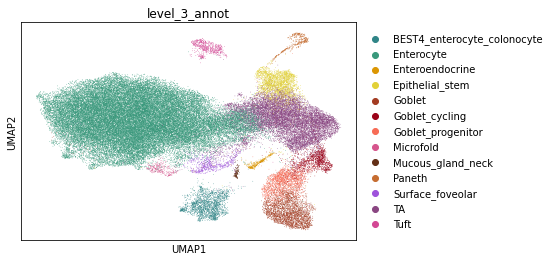

In [48]:
sc.pp.neighbors(epi_si_adult, use_rep="X_scANVI")
sc.tl.umap(epi_si_adult)
sc.pl.umap(epi_si_adult, color=['level_3_annot'])

In [50]:
epi_si_adult.obs['level_3_annot'] = (
    epi_si_adult.obs["level_3_annot"]
    .map(lambda x: {
 'Mucous_gland_neck':'Mucous_gland_neck_INFLARE'
        
         }.get(x, x))
    .astype("category")
)

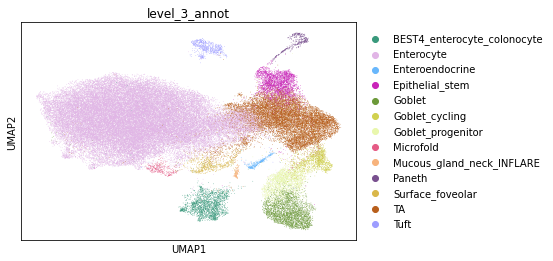

In [51]:
sc.pl.umap(epi_si_adult,color='level_3_annot',palette = ['#39997c',#BEST4
                                               '#e1b5e6',#enterocyte
                                                '#68b7fc',#enteroendocrine
                                                       '#c924b9',#stem
                                               
                                               '#6c9939',#goblet
                                               '#d1d14f',#goblet_cycling
                                               '#e9f7ad',#goblet progenitor
                                                  '#e55b85',#Microfold
                                               
                                               
                                               '#f7b37c',#MUC6
                                                   '#79508f',#paneth
                                                  '#d9b74a',#MUC5AC
                                
                                               '#b85f1c',#TA
                                               '#9d9dff',#tuft
                                               
                                               
    
    
                                              ])

In [52]:
epi_si_adult

AnnData object with n_obs × n_vars = 72356 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

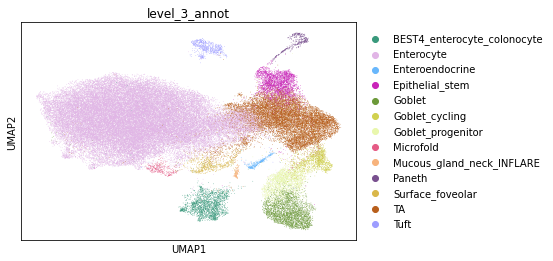

In [54]:
sc.pl.umap(epi_si_adult,color='level_3_annot')

In [55]:
epi_si_adult.obs.level_3_annot.value_counts()

Enterocyte                     47136
TA                             11700
Goblet                          2843
Epithelial_stem                 2623
BEST4_enterocyte_colonocyte     2057
Goblet_progenitor               2024
Goblet_cycling                  1394
Surface_foveolar                 718
Tuft                             642
Paneth                           414
Microfold                        338
Enteroendocrine                  324
Mucous_gland_neck_INFLARE        143
Name: level_3_annot, dtype: int64

In [56]:
epi_si_adult.obs.study.value_counts()

Elmentaite2021      34790
Martin2019          11932
Wang2020             8121
CBTM_unpublished     5150
Dominguez2022        5039
Yu2021               4028
He2020GenomeBio      3254
Jaeger2021             39
James2020               3
Name: study, dtype: int64

In [58]:
epi_si_adult

AnnData object with n_obs × n_vars = 72356 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [59]:
epi_si_adult.obs.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.splicedandunspliced_counts.20231106.csv')

In [60]:
del epi_si_adult.obs

In [61]:
#save
epi_si_adult.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.splicedandunspliced_counts.20231106.h5ad')